=== Dataset Overview ===


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0



Dataset shape: (442, 11)

Missing values per column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


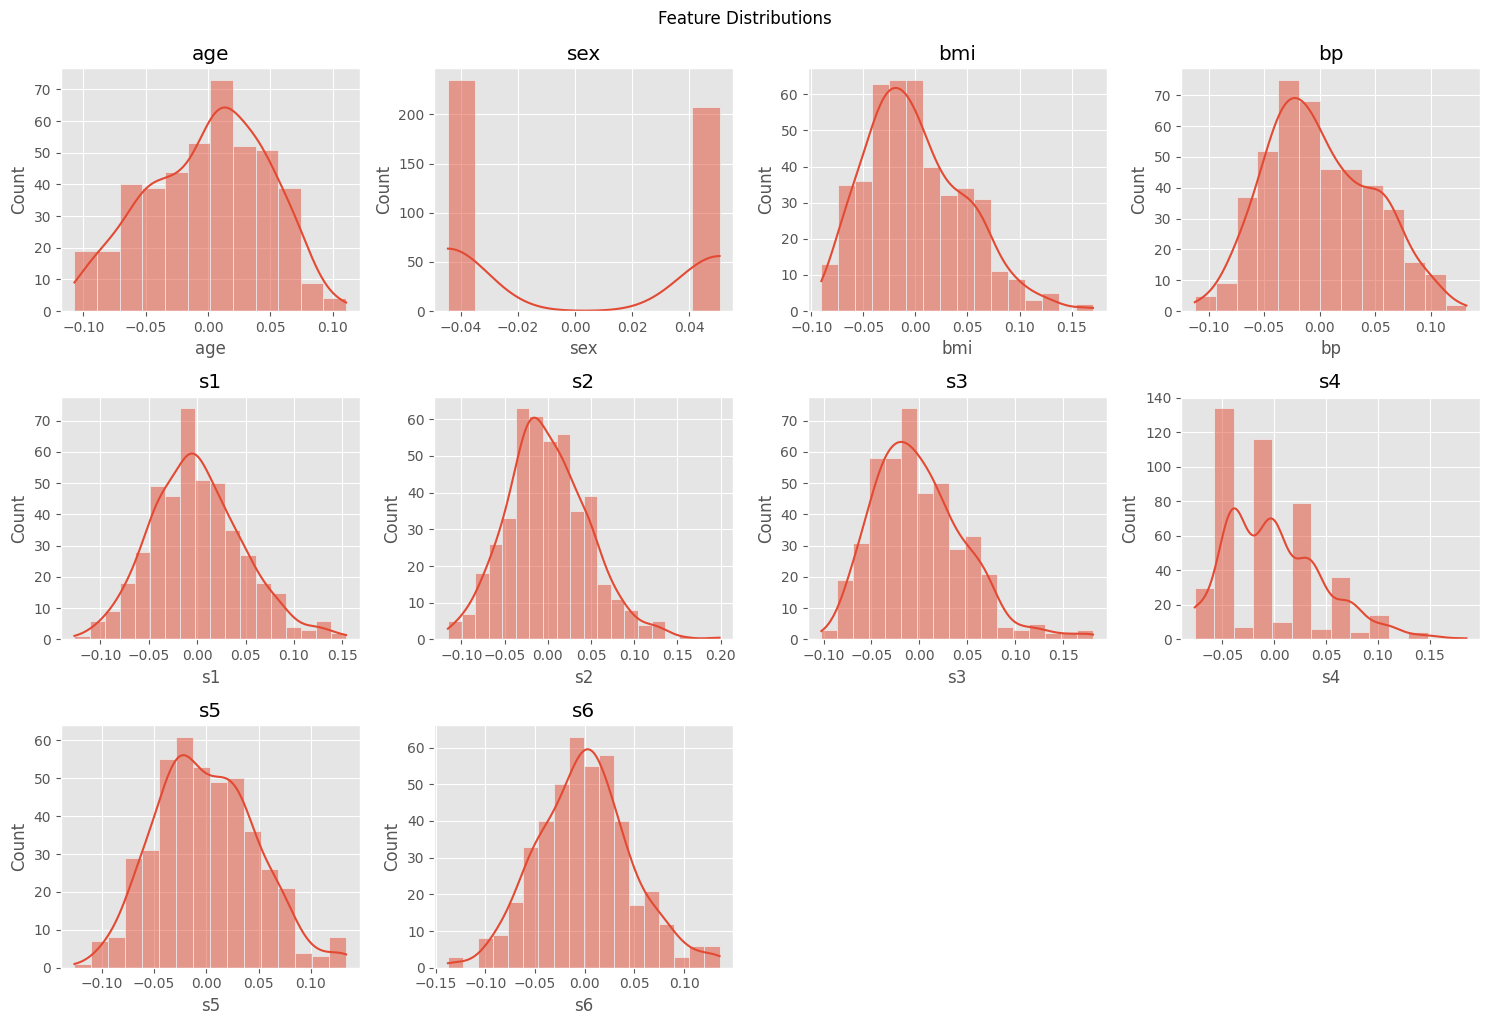

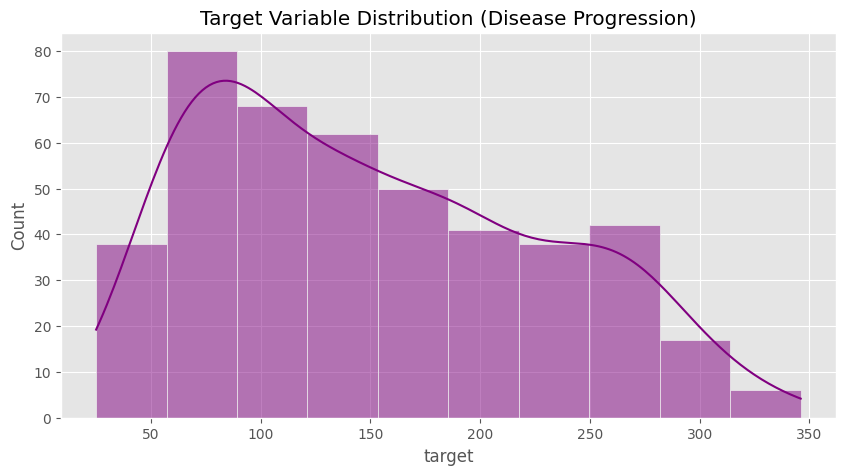

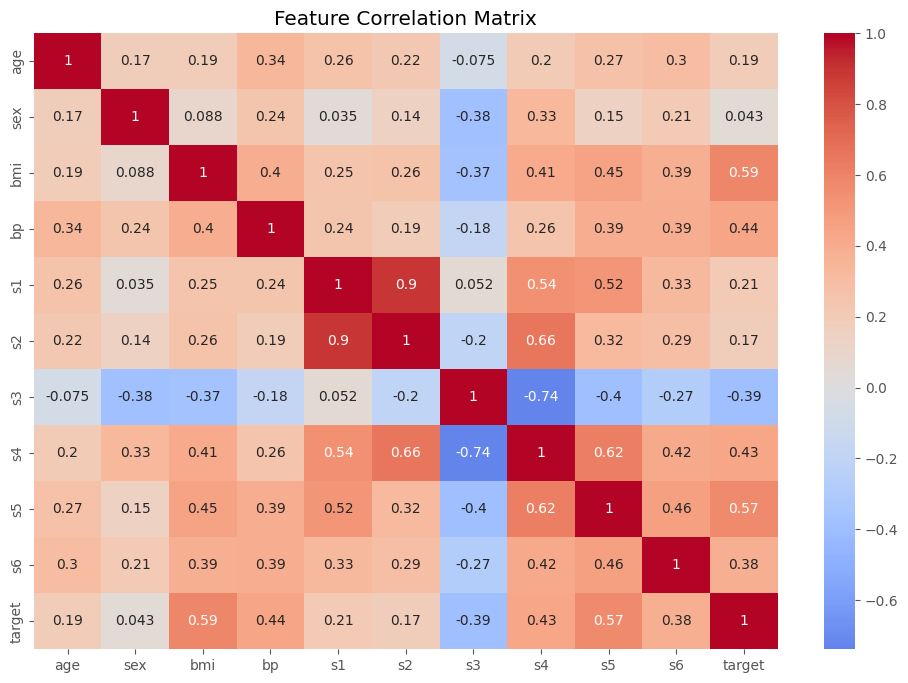


=== Linear Regression ===
MSE: 2900.19
R² Score: 0.45


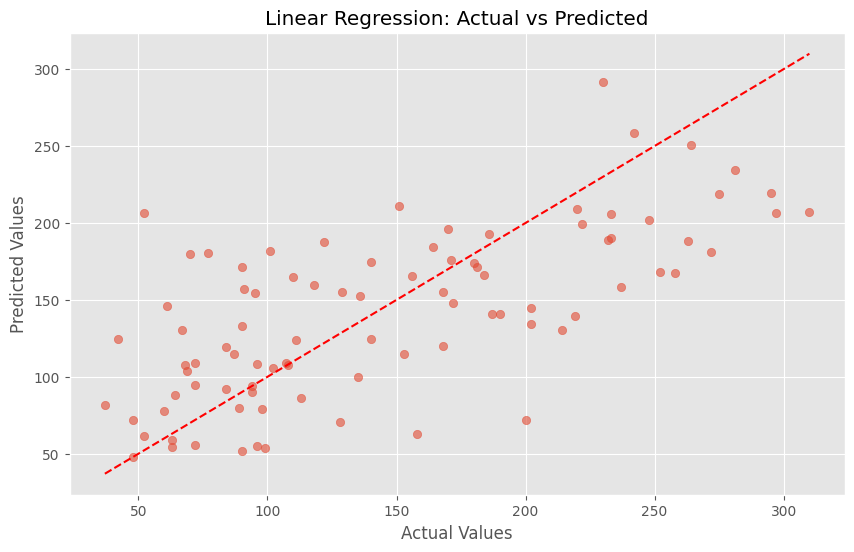

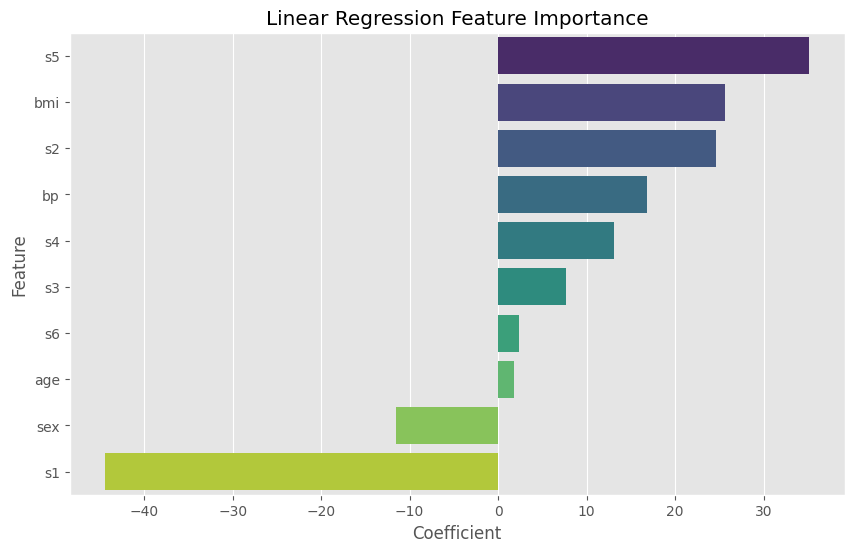


=== Decision Tree ===
MSE: 3568.97
R² Score: 0.33


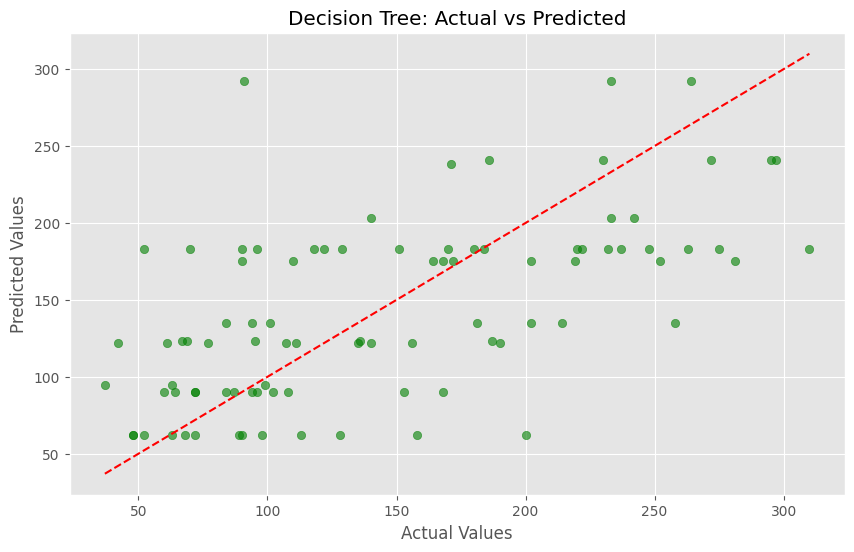

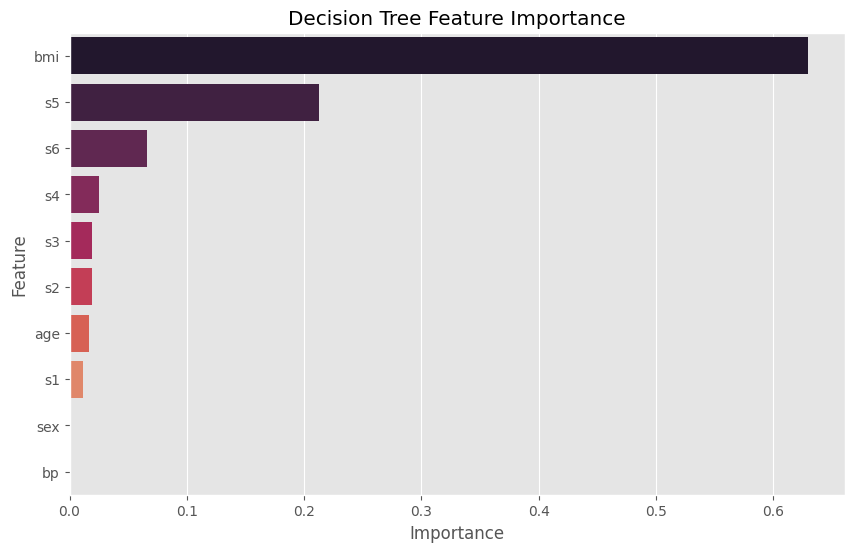


=== Artificial Neural Network ===
3/3 [==============================] - 0s 4ms/step
MSE: 2704.65
R² Score: 0.49


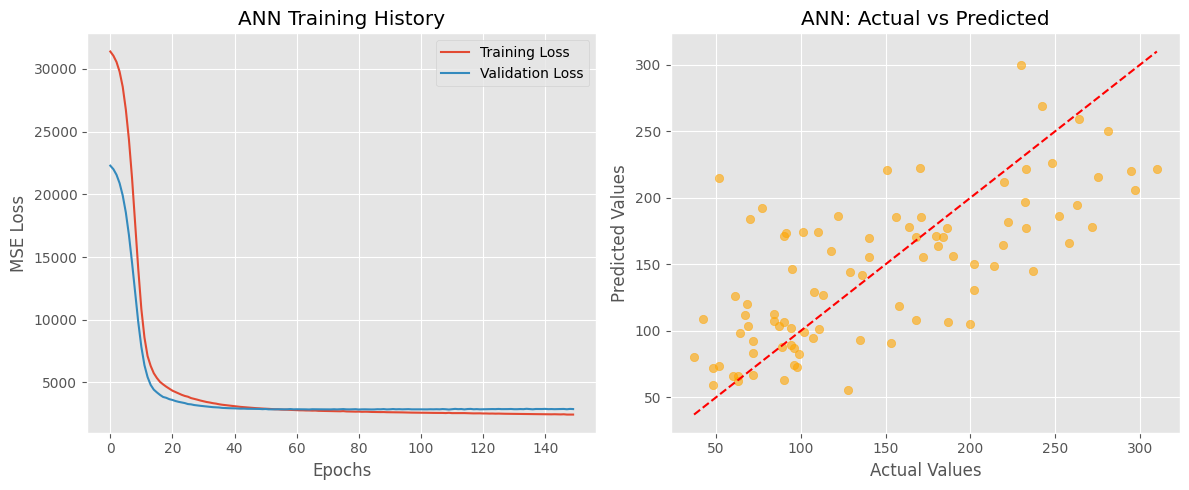


=== Final Results Summary ===


,Model,MSE,R² Score
0,Linear Regression,2900.193628,0.452603
1,Decision Tree,3568.965261,0.326375
2,ANN,2704.645538,0.489512


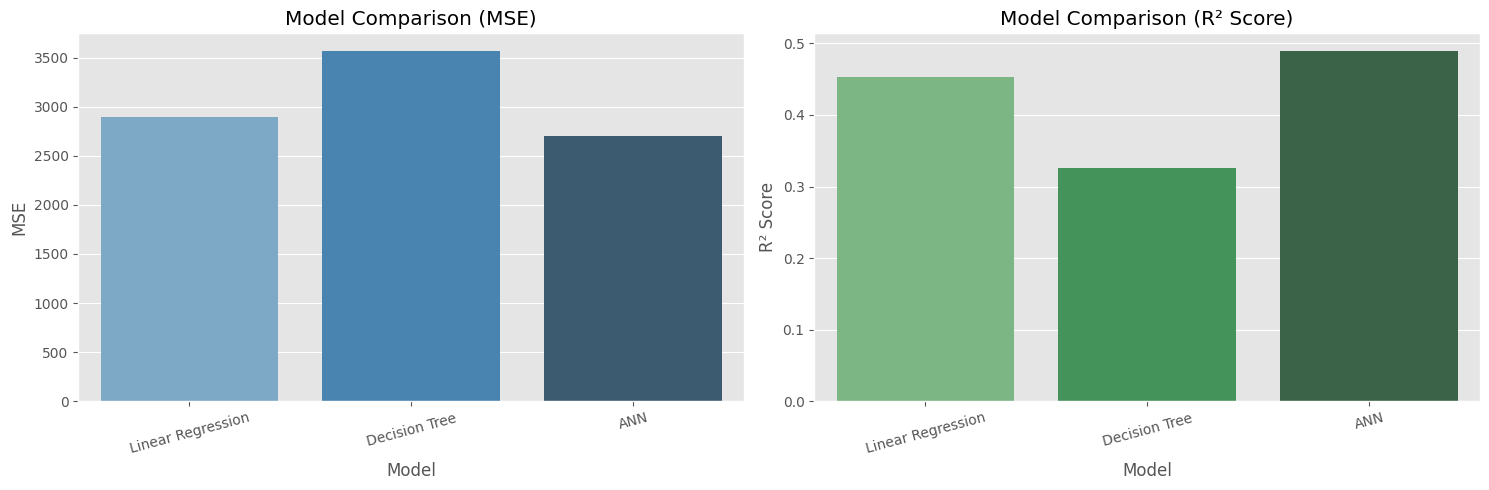

In [5]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# ==================== DATA LOADING & EXPLORATION ====================
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Create DataFrame for visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("=== Dataset Overview ===")
display(df.head())
print(f"\nDataset shape: {df.shape}")
print("\nMissing values per column:")
print(df.isnull().sum())

# Feature distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(feature_names):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.suptitle('Feature Distributions', y=1.02)
plt.show()

# Target distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['target'], kde=True, color='purple')
plt.title('Target Variable Distribution (Disease Progression)')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# ==================== DATA PREPROCESSING ====================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==================== LINEAR REGRESSION ====================
print("\n=== Linear Regression ===")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"MSE: {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

# Feature importance
lr_coef = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr.coef_})
lr_coef = lr_coef.sort_values('Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_coef, hue='Feature', dodge=False, palette='viridis', legend=False)
plt.title('Linear Regression Feature Importance')
plt.show()

# ==================== DECISION TREE ====================
print("\n=== Decision Tree ===")
dt = DecisionTreeRegressor(random_state=42, max_depth=4)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"MSE: {mse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted')
plt.grid(True)
plt.show()

# Feature importance
dt_feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': dt.feature_importances_})
dt_feat_imp = dt_feat_imp.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_feat_imp, hue='Feature', dodge=False, palette='rocket', legend=False)
plt.title('Decision Tree Feature Importance')
plt.show()

# ==================== ARTIFICIAL NEURAL NETWORK ====================
print("\n=== Artificial Neural Network ===")
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=16, 
                   validation_split=0.2, verbose=0)

y_pred_ann = model.predict(X_test_scaled).flatten()
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
print(f"MSE: {mse_ann:.2f}")
print(f"R² Score: {r2_ann:.2f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('ANN Training History')
plt.legend()

# Plot actual vs predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ann, alpha=0.6, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('ANN: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

# ==================== MODEL COMPARISON ====================
# Results table
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'ANN'],
    'MSE': [mse_lr, mse_dt, mse_ann],
    'R² Score': [r2_lr, r2_dt, r2_ann]
})
print("\n=== Final Results Summary ===")
display(results)

# Visual comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results, hue='Model', dodge=False, palette='Blues_d', legend=False)
plt.title('Model Comparison (MSE)')
plt.xticks(rotation=15)

# Model Comparison - R² Score
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R² Score', data=results, hue='Model', dodge=False, palette='Greens_d', legend=False)
plt.title('Model Comparison (R² Score)')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()